# Adversarial attacks

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers 
from keras import Sequential
from keras.losses import categorical_crossentropy as CCE

from sklearn.model_selection import train_test_split
import networkx as nx
import time

from multiprocessing import Process, Manager, Value, Array
from multiprocessing.pool import ThreadPool as Pool

import demoFunctions as dF

## Download MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Prepare the images: normalization, padding (from 28x28 to 32x32), train-test split, one-hot encoding of the labels

In [3]:
x_train, y_train_OH, xT, y_OH = dF.dataset_preparation(x_train, x_test, y_train, y_test)

## LeNet5

### Initialize CNN classifier

In [4]:
inputShape = xT[0].shape
model = dF.LeNet5(inputShape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Import classifier weights

In [5]:
path_local = 'modelWeights.h5'

model.load_weights(path_local)

### Initial loss computation for every input shape

In [6]:
loss = CCE(y_OH, model.predict(xT))
print(loss)

tf.Tensor(
[4.4107533e-06 1.1920930e-07 1.7626646e-04 ... 1.1003623e-04 1.4813184e-03
 9.4175784e-06], shape=(10000,), dtype=float32)


## Decentralized Variance Reduced Zeroth Order Frank-Wolfe

Iterazione n. 1
I'm in else
Computing stochastic gradient estimation in node: 0
Node 0 elapsed CPU time: 8.849883794784546
Computing stochastic gradient estimation in node: 1
Node 1 elapsed CPU time: 8.90987491607666
Computing stochastic gradient estimation in node: 2
Node 2 elapsed CPU time: 8.537170886993408
Computing stochastic gradient estimation in node: 3
Node 3 elapsed CPU time: 8.056237936019897
Computing stochastic gradient estimation in node: 4
Node 4 elapsed CPU time: 8.778854846954346
Computing stochastic gradient estimation in node: 5
Node 5 elapsed CPU time: 8.282786130905151
Computing stochastic gradient estimation in node: 6
Node 6 elapsed CPU time: 8.353398084640503
Computing stochastic gradient estimation in node: 7
Node 7 elapsed CPU time: 7.910881042480469
Computing stochastic gradient estimation in node: 8
Node 8 elapsed CPU time: 8.157931804656982
Computing stochastic gradient estimation in node: 9
Node 9 elapsed CPU time: 8.32928204536438
Perturbation:



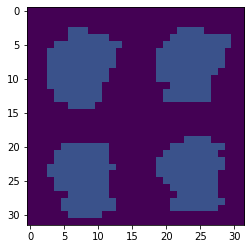

Avg. perturbation per pixel after convex combination 0.025774322254447764
Iteration 1 elapsed CPU time:  84.39223194122314
Misclassified at the end: 2
Perturbed images:



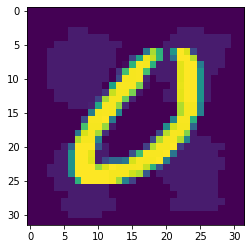

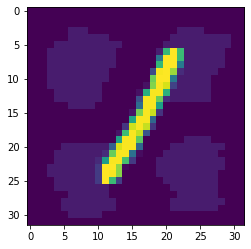

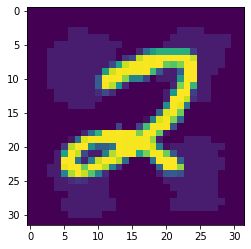

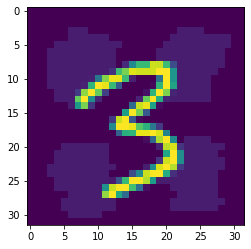

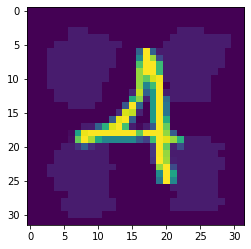

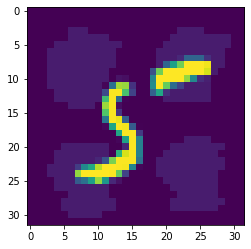

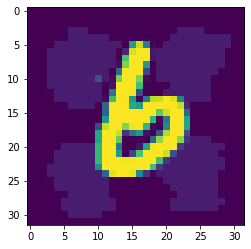

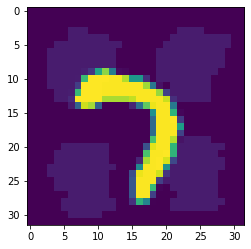

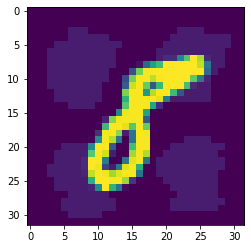

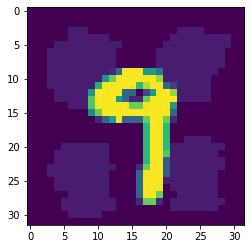

Number of images not misclassified per class:
 {0: 99, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 99, 7: 100, 8: 100, 9: 100}
Iterazione n. 2
I'm in else
Computing stochastic gradient estimation in node: 0
Node 0 elapsed CPU time: 10.387854099273682
Computing stochastic gradient estimation in node: 1
Node 1 elapsed CPU time: 8.675734043121338
Computing stochastic gradient estimation in node: 2
Node 2 elapsed CPU time: 7.898927688598633
Computing stochastic gradient estimation in node: 3
Node 3 elapsed CPU time: 8.298673152923584
Computing stochastic gradient estimation in node: 4
Node 4 elapsed CPU time: 9.327152252197266


KeyboardInterrupt: 

In [7]:
dF.main_DecentrVRZOFW(xT, y_OH, loss, model)

## Distributed Zeroth Order Frank-Wolfe

Original Graph: 



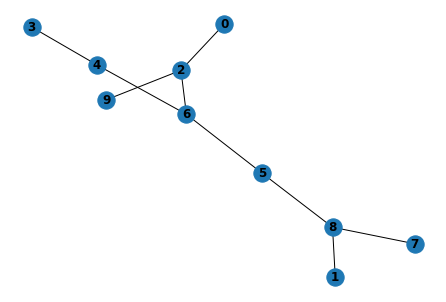

(5, 9) added
(3, 9) added
(0, 7) added
(1, 7) added
(3, 8) added
(4, 9) added
(6, 7) added
(4, 7) added
(3, 5) added
(0, 3) added
(1, 6) added
(1, 3) added
(3, 7) added
(0, 6) added
(2, 5) added
(2, 7) added
(0, 4) added
(3, 6) added
(1, 9) added
(1, 4) added
(2, 8) added
(1, 2) added
(4, 5) added
(6, 9) added
(1, 5) added
(0, 8) added
(6, 8) added
(0, 1) added
(2, 3) added
(8, 9) added
(4, 8) added
(2, 4) added

Graph modified:



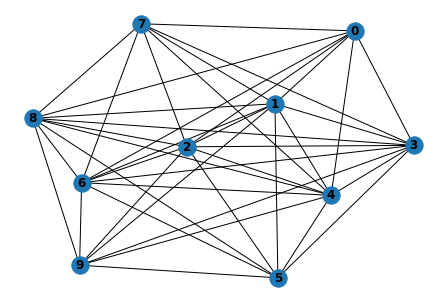

Nodes degree: [(0, 7), (1, 9), (2, 9), (3, 9), (4, 9), (5, 7), (6, 9), (7, 7), (8, 9), (9, 7)] 

||W-J||: 0.48989794855663554
Iteration 1

avg_noises() call, node 0

avg_noises() call, node 1
avg_noises() call, node 2
avg_noises() call, node 3


avg_noises() call, node 4


avg_noises() call, node 5
avg_noises() call, node 6


avg_noises() call, node 7
avg_noises() call, node 8


avg_noises() call, node 9

gradient_estimation() call, node 0
gradient_estimation() call, node 2


gradient_estimation() call, node 1

gradient_estimation() call, node 4
gradient_estimation() call, node 3

gradient_estimation() call, node 5


gradient_estimation() call, node 6

gradient_estimation() call, node 7

gradient_estimation() call, node 8

gradient_estimation() call, node 9

256 images perturbed on a single pixel in node 9 up to now

256 images perturbed on a single pixel in node 3 up to now

256 images perturbed on a single pixel in node 5 up to now

256 images perturbed on a single pixel in node 7 up

KeyboardInterrupt: 

In [8]:
dF.main_DistrZOFW(model, xT, y_OH)

## Zeroth Order Inexact Update

Parameters:
xi = 0.4,
mu = 0.001,
c_t = 1,
m = 10240,
gamma_t = 0.001


Working on image 1 of 100 with label 0

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 49 iterations.
Iterazione n. 3
ICG completed after 32 iterations.
Iterazione n. 4
ICG completed after 8 iterations.
Iterazione n. 5
ICG completed after 4 iterations.
Iterazione n. 6
ICG completed after 3 iterations.
Iterazione n. 7
ICG completed after 3 iterations.
Iterazione n. 8
ICG completed after 3 iterations.
Iterazione n. 9
ICG completed after 4 iterations.
Iterazione n. 10
ICG completed after 2 iterations.
Iterazione n. 11
ICG completed after 3 iterations.
Iterazione n. 12
ICG completed after 3 iterations.
Iterazione n. 13
ICG completed after 2 iterations.
Iterazione n. 14
ICG completed after 2 iterations.
Iterazione n. 15
ICG completed after 2 iterations.
Iterazione n. 16
ICG completed after 3 iterations.
Iterazione n. 17
ICG completed after 3 iterations.
Iterazione n. 18
ICG complet

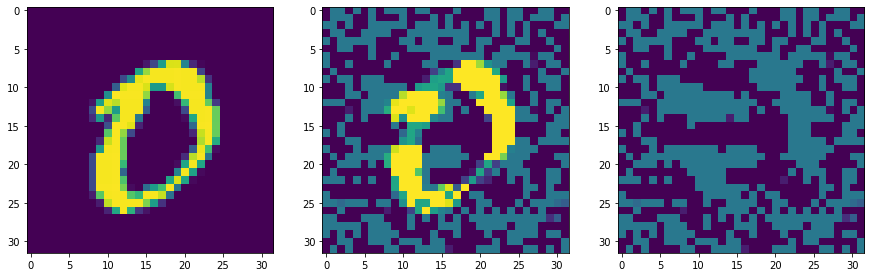


The misclassified images up to now are 1 out of 6:  [(50, 0, 2)] 


Working on image 7 of 100 with label 0

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 52 iterations.
Iterazione n. 3
ICG completed after 60 iterations.
Iterazione n. 4
ICG completed after 67 iterations.
Iterazione n. 5
ICG completed after 73 iterations.
Iterazione n. 6
ICG completed after 76 iterations.
Iterazione n. 7
ICG completed after 79 iterations.
Iterazione n. 8
ICG completed after 82 iterations.
Iterazione n. 9
ICG completed after 85 iterations.
Iterazione n. 10
ICG completed after 91 iterations.
Iterazione n. 11
ICG completed after 85 iterations.
Iterazione n. 12
ICG completed after 74 iterations.
Iterazione n. 13
ICG completed after 38 iterations.
Iterazione n. 14
ICG completed after 23 iterations.
Iterazione n. 15
ICG completed after 15 iterations.
Iterazione n. 16
ICG completed after 24 iterations.
Iterazione n. 17
ICG completed after 8 iterations.
Iterazione n. 18
I

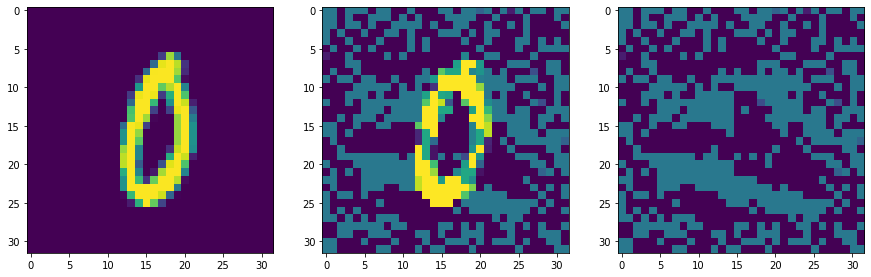


The misclassified images up to now are 2 out of 9:  [(50, 0, 2), (80, 0, 2)] 


Working on image 10 of 100 with label 0

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 24 iterations.
Iterazione n. 3
ICG completed after 4 iterations.
Iterazione n. 4
ICG completed after 3 iterations.
Iterazione n. 5
ICG completed after 2 iterations.
Iterazione n. 6
ICG completed after 4 iterations.
Iterazione n. 7
ICG completed after 2 iterations.
Iterazione n. 8
ICG completed after 5 iterations.
Iterazione n. 9
ICG completed after 3 iterations.
Iterazione n. 10
ICG completed after 3 iterations.
Iterazione n. 11
ICG completed after 2 iterations.
Iterazione n. 12
ICG completed after 3 iterations.
Iterazione n. 13
ICG completed after 3 iterations.
Iterazione n. 14
ICG completed after 3 iterations.
Iterazione n. 15
ICG completed after 3 iterations.
Iterazione n. 16
ICG completed after 4 iterations.
Iterazione n. 17
ICG completed after 3 iterations.
Iterazione n. 18
IC

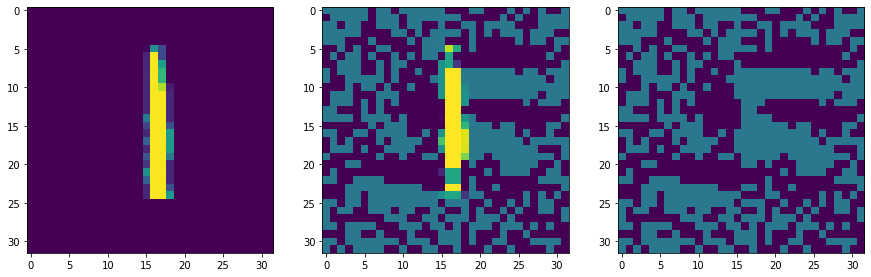


The misclassified images up to now are 3 out of 11:  [(50, 0, 2), (80, 0, 2), (100, 1, 5)] 


Working on image 12 of 100 with label 1

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 3 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


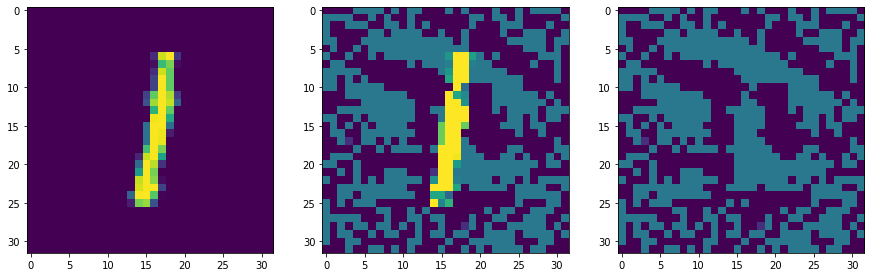


The misclassified images up to now are 4 out of 12:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2)] 


Working on image 13 of 100 with label 1

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.
Iterazione n. 3
ICG completed after 3 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


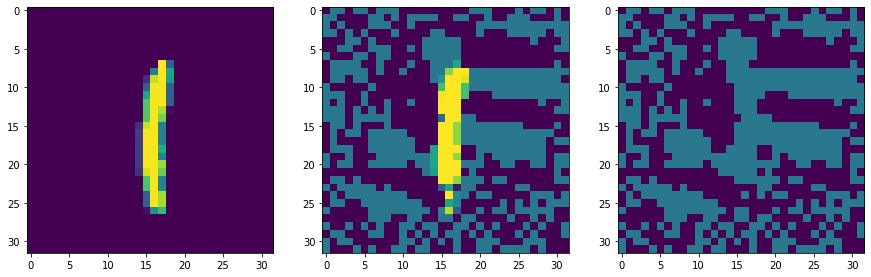


The misclassified images up to now are 5 out of 13:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5)] 


Working on image 14 of 100 with label 1

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


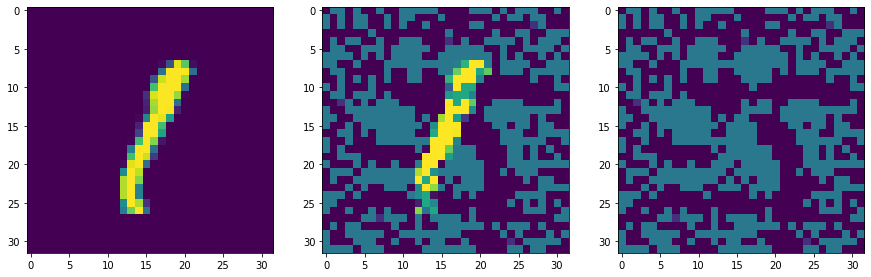


The misclassified images up to now are 6 out of 14:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2)] 


Working on image 15 of 100 with label 1

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 3 iterations.
Iterazione n. 5
ICG completed after 2 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


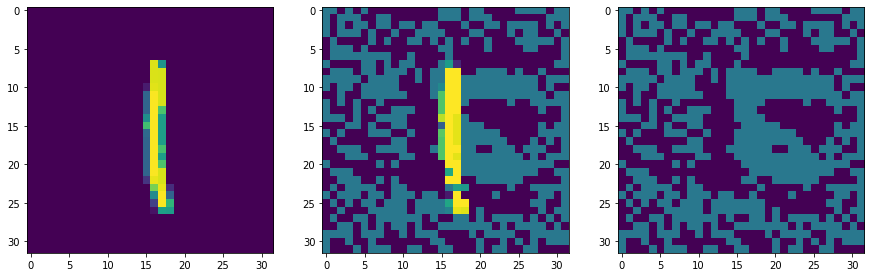


The misclassified images up to now are 7 out of 15:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5)] 


Working on image 16 of 100 with label 1

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 2 iterations.

New label: 8

Original Image - Perturbed Image - Noise 


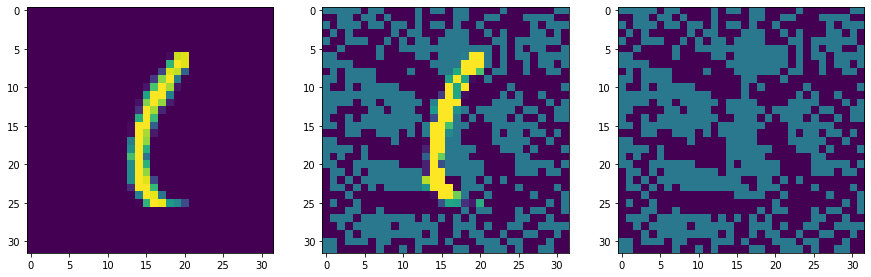


The misclassified images up to now are 8 out of 16:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8)] 


Working on image 17 of 100 with label 1

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 2 iterations.
Iterazione n. 5
ICG completed after 2 iterations.
Iterazione n. 6
ICG completed after 3 iterations.

New label: 8

Original Image - Perturbed Image - Noise 


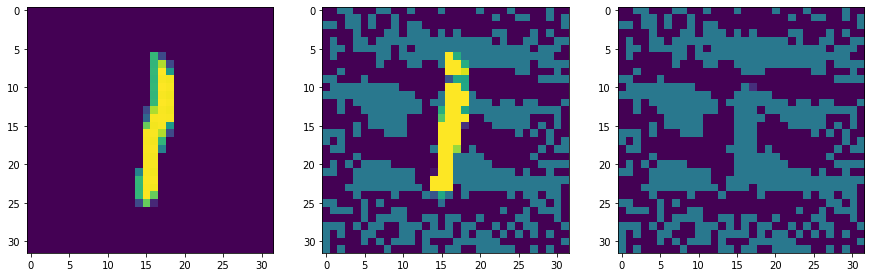


The misclassified images up to now are 9 out of 17:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8)] 


Working on image 18 of 100 with label 1

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 3 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 4 iterations.
Iterazione n. 5
ICG completed after 3 iterations.
Iterazione n. 6
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


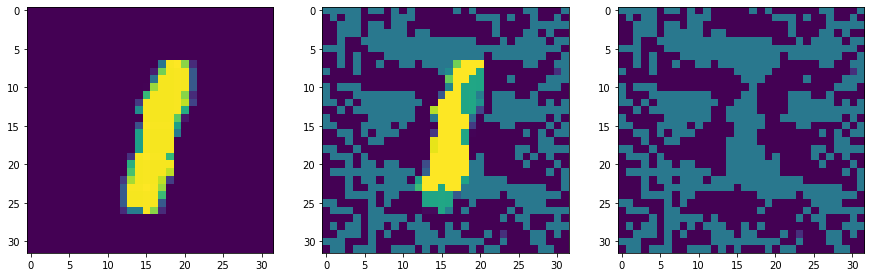


The misclassified images up to now are 10 out of 18:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2)] 


Working on image 19 of 100 with label 1

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 4 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


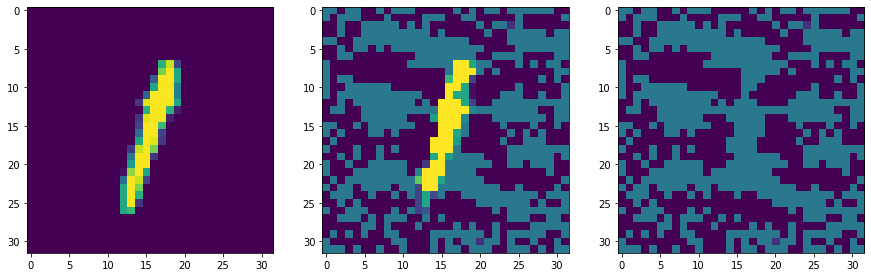


The misclassified images up to now are 11 out of 19:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2)] 


Working on image 20 of 100 with label 1

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 3 iterations.
Iterazione n. 3
ICG completed after 3 iterations.

New label: 7

Original Image - Perturbed Image - Noise 


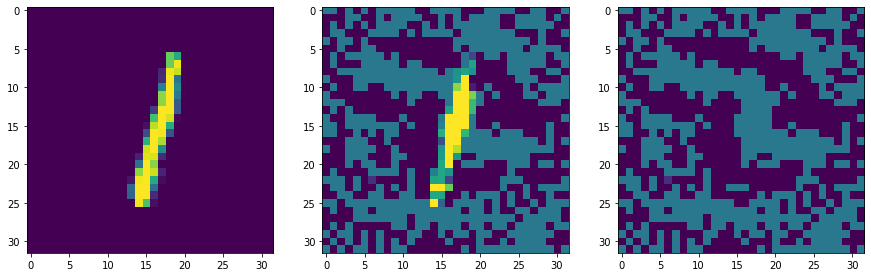


The misclassified images up to now are 12 out of 20:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7)] 


Working on image 21 of 100 with label 2

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 1 iterations.
Iterazione n. 3
ICG completed after 49 iterations.
Iterazione n. 4
ICG completed after 69 iterations.
Iterazione n. 5
ICG completed after 74 iterations.
Iterazione n. 6
ICG completed after 46 iterations.
Iterazione n. 7
ICG completed after 25 iterations.
Iterazione n. 8
ICG completed after 58 iterations.
Iterazione n. 9
ICG completed after 43 iterations.
Iterazione n. 10
ICG completed after 37 iterations.
Iterazione n. 11
ICG completed after 40 iterations.
Iterazione n. 12
ICG completed after 43 iterations.
Iterazione n. 13
ICG completed after 13 iterations.
Iterazione n. 14
ICG completed after 38 iterations.
Iterazione n. 15
ICG complete

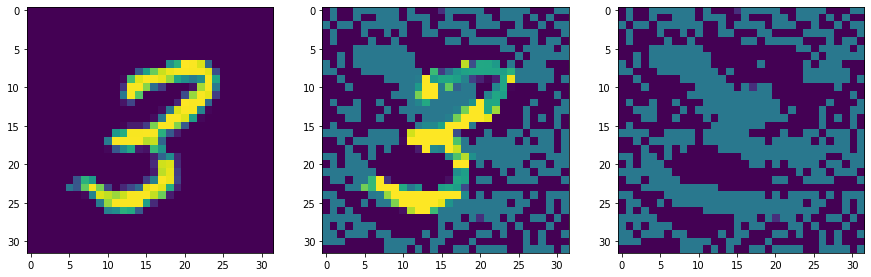


The misclassified images up to now are 13 out of 31:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5)] 


Working on image 32 of 100 with label 3

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 40 iterations.
Iterazione n. 3
ICG completed after 7 iterations.
Iterazione n. 4
ICG completed after 3 iterations.
Iterazione n. 5
ICG completed after 3 iterations.
Iterazione n. 6
ICG completed after 4 iterations.
Iterazione n. 7
ICG completed after 4 iterations.
Iterazione n. 8
ICG completed after 6 iterations.
Iterazione n. 9
ICG completed after 4 iterations.
Iterazione n. 10
ICG completed after 5 iterations.
Iterazione n. 11
ICG completed after 5 iterations.
Iterazione n. 12
ICG completed after 5 iterations.
Iterazione n. 13
ICG completed after 4 iterations.
Iterazione n. 14
ICG completed after 4 iterations.
Iterazione n. 15
ICG comple

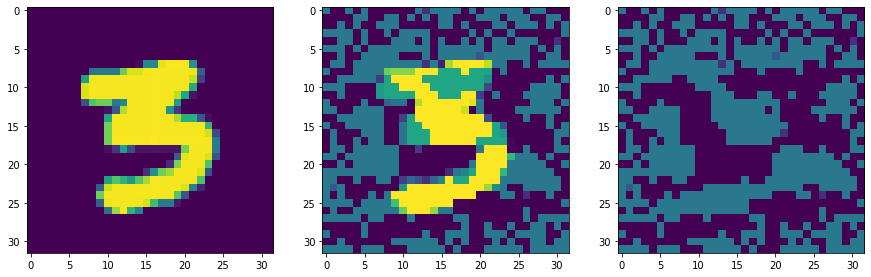


The misclassified images up to now are 14 out of 33:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5)] 


Working on image 34 of 100 with label 3

Iterazione n. 1
ICG completed after 3 iterations.
Iterazione n. 2
ICG completed after 12 iterations.
Iterazione n. 3
ICG completed after 4 iterations.
Iterazione n. 4
ICG completed after 4 iterations.
Iterazione n. 5
ICG completed after 3 iterations.
Iterazione n. 6
ICG completed after 4 iterations.
Iterazione n. 7
ICG completed after 6 iterations.
Iterazione n. 8
ICG completed after 3 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


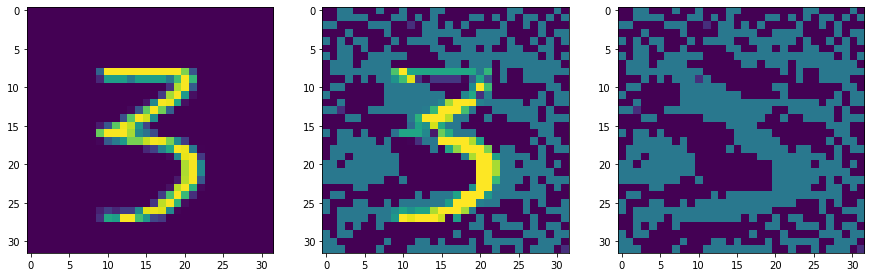


The misclassified images up to now are 15 out of 34:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5)] 


Working on image 35 of 100 with label 3

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 5 iterations.
Iterazione n. 5
ICG completed after 3 iterations.
Iterazione n. 6
ICG completed after 6 iterations.
Iterazione n. 7
ICG completed after 3 iterations.
Iterazione n. 8
ICG completed after 4 iterations.
Iterazione n. 9
ICG completed after 4 iterations.
Iterazione n. 10
ICG completed after 3 iterations.
Iterazione n. 11
ICG completed after 2 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


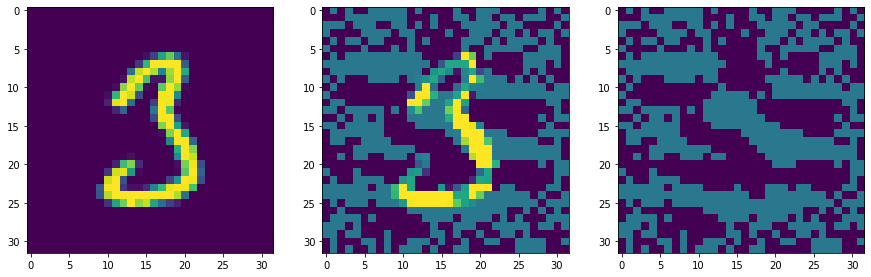


The misclassified images up to now are 16 out of 35:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5)] 


Working on image 36 of 100 with label 3

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 31 iterations.
Iterazione n. 3
ICG completed after 11 iterations.
Iterazione n. 4
ICG completed after 4 iterations.
Iterazione n. 5
ICG completed after 2 iterations.
Iterazione n. 6
ICG completed after 3 iterations.
Iterazione n. 7
ICG completed after 4 iterations.
Iterazione n. 8
ICG completed after 2 iterations.
Iterazione n. 9
ICG completed after 3 iterations.
Iterazione n. 10
ICG completed after 4 iterations.
Iterazione n. 11
ICG completed after 6 iterations.
Iterazione n. 12
ICG completed after 3 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


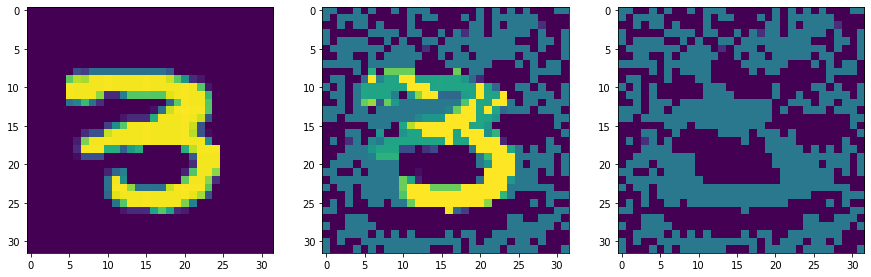


The misclassified images up to now are 17 out of 36:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5)] 


Working on image 37 of 100 with label 3

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 47 iterations.
Iterazione n. 3
ICG completed after 49 iterations.
Iterazione n. 4
ICG completed after 26 iterations.
Iterazione n. 5
ICG completed after 16 iterations.
Iterazione n. 6
ICG completed after 21 iterations.
Iterazione n. 7
ICG completed after 5 iterations.
Iterazione n. 8
ICG completed after 4 iterations.
Iterazione n. 9
ICG completed after 3 iterations.
Iterazione n. 10
ICG completed after 4 iterations.
Iterazione n. 11
ICG completed after 4 iterations.
Iterazione n. 12
ICG completed after 4 iterations.
Iterazione n. 13
ICG completed after 3 iterations.
Iterazione n. 14
ICG c

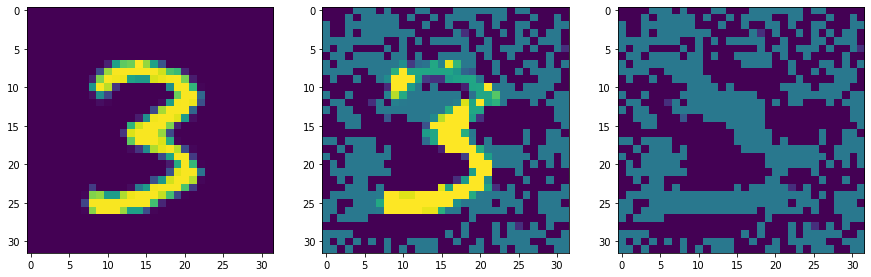


The misclassified images up to now are 18 out of 37:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5)] 


Working on image 38 of 100 with label 3

Iterazione n. 1
ICG completed after 3 iterations.
Iterazione n. 2
ICG completed after 52 iterations.
Iterazione n. 3
ICG completed after 28 iterations.
Iterazione n. 4
ICG completed after 8 iterations.
Iterazione n. 5
ICG completed after 2 iterations.
Iterazione n. 6
ICG completed after 3 iterations.
Iterazione n. 7
ICG completed after 4 iterations.
Iterazione n. 8
ICG completed after 3 iterations.
Iterazione n. 9
ICG completed after 3 iterations.
Iterazione n. 10
ICG completed after 4 iterations.
Iterazione n. 11
ICG completed after 3 iterations.
Iterazione n. 12
ICG completed after 4 iterations.
Iterazione n. 13
ICG completed after 4 iterations.

New label: 

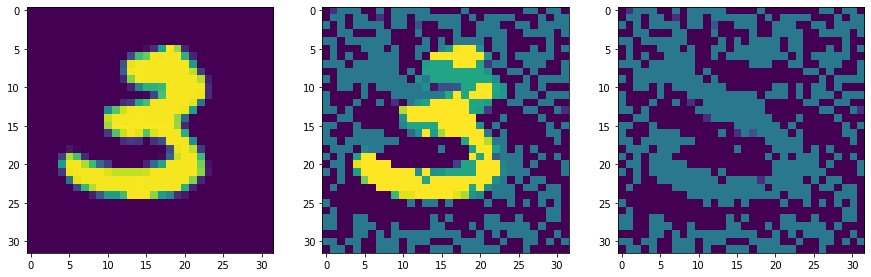


The misclassified images up to now are 19 out of 38:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5)] 


Working on image 39 of 100 with label 3

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 37 iterations.
Iterazione n. 3
ICG completed after 61 iterations.
Iterazione n. 4
ICG completed after 32 iterations.
Iterazione n. 5
ICG completed after 6 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


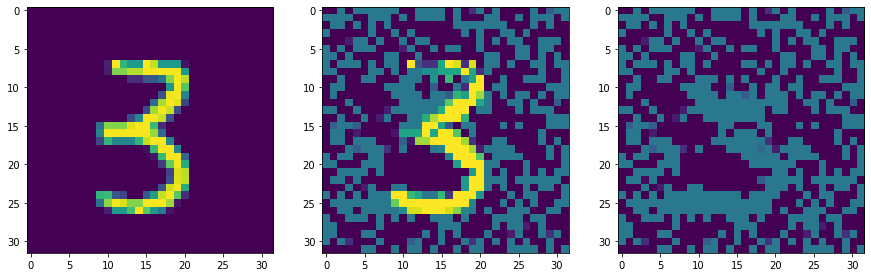


The misclassified images up to now are 20 out of 39:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5)] 


Working on image 40 of 100 with label 3

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 14 iterations.
Iterazione n. 3
ICG completed after 4 iterations.
Iterazione n. 4
ICG completed after 6 iterations.
Iterazione n. 5
ICG completed after 4 iterations.
Iterazione n. 6
ICG completed after 4 iterations.
Iterazione n. 7
ICG completed after 4 iterations.
Iterazione n. 8
ICG completed after 4 iterations.
Iterazione n. 9
ICG completed after 3 iterations.
Iterazione n. 10
ICG completed after 4 iterations.
Iterazione n. 11
ICG completed after 5 iterations.
Iterazione n. 12
ICG completed after 9 iterations.
Iterazione n. 13
ICG completed after 3

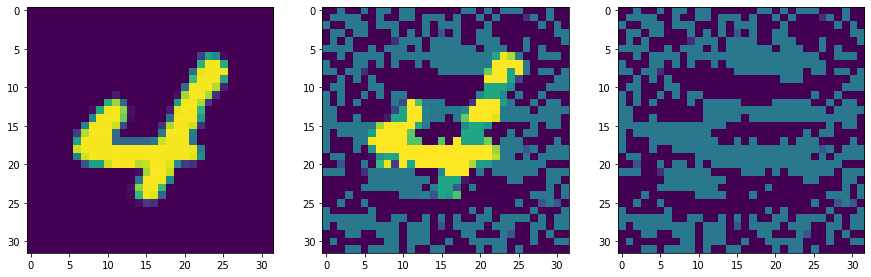


The misclassified images up to now are 21 out of 41:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2)] 


Working on image 42 of 100 with label 4

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 11 iterations.
Iterazione n. 3
ICG completed after 4 iterations.
Iterazione n. 4
ICG completed after 4 iterations.
Iterazione n. 5
ICG completed after 2 iterations.
Iterazione n. 6
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


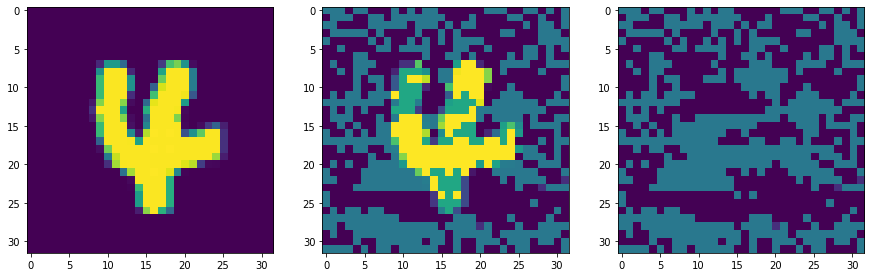


The misclassified images up to now are 22 out of 42:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2)] 


Working on image 43 of 100 with label 4

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.

New label: 7

Original Image - Perturbed Image - Noise 


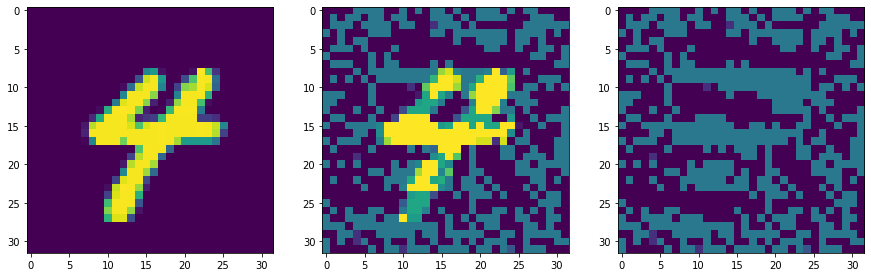


The misclassified images up to now are 23 out of 43:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7)] 


Working on image 44 of 100 with label 4

Iterazione n. 1
ICG completed after 3 iterations.
Iterazione n. 2
ICG completed after 4 iterations.

New label: 9

Original Image - Perturbed Image - Noise 


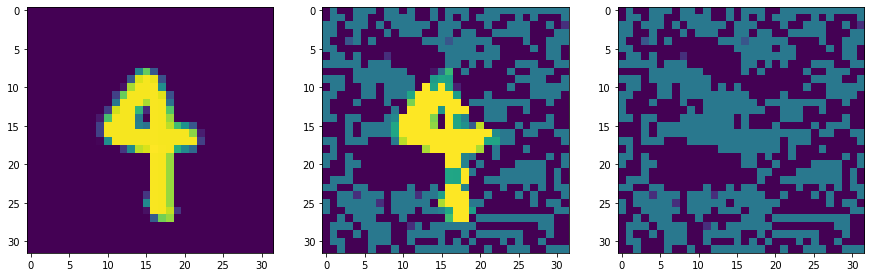


The misclassified images up to now are 24 out of 44:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9)] 


Working on image 45 of 100 with label 4

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


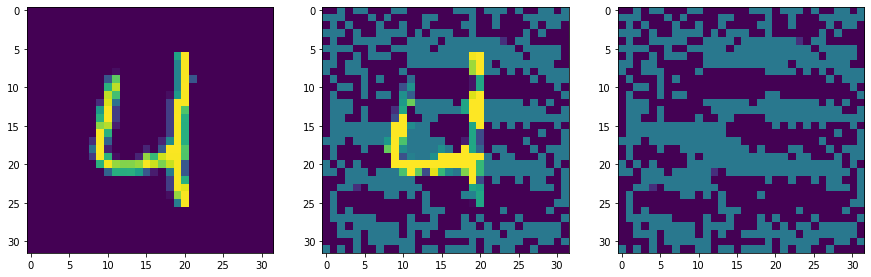


The misclassified images up to now are 25 out of 45:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2)] 


Working on image 46 of 100 with label 4

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


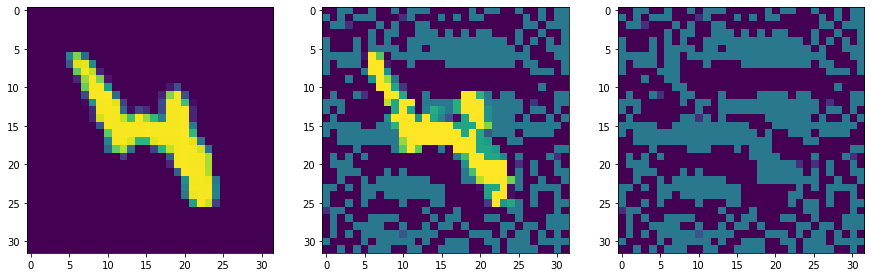


The misclassified images up to now are 26 out of 46:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5)] 


Working on image 47 of 100 with label 4

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 7 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 3 iterations.

New label: 3

Original Image - Perturbed Image - Noise 


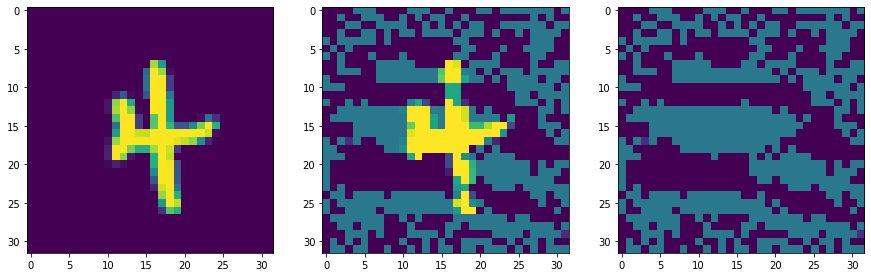


The misclassified images up to now are 27 out of 47:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3)] 


Working on image 48 of 100 with label 4

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.

New label: 9

Original Image - Perturbed Image - Noise 


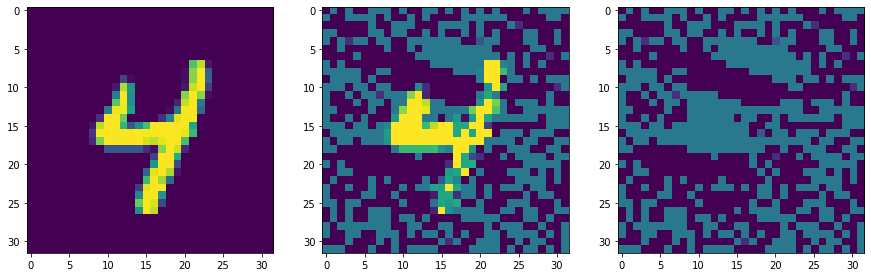


The misclassified images up to now are 28 out of 48:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9)] 


Working on image 49 of 100 with label 4

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 3 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 2 iterations.

New label: 8

Original Image - Perturbed Image - Noise 


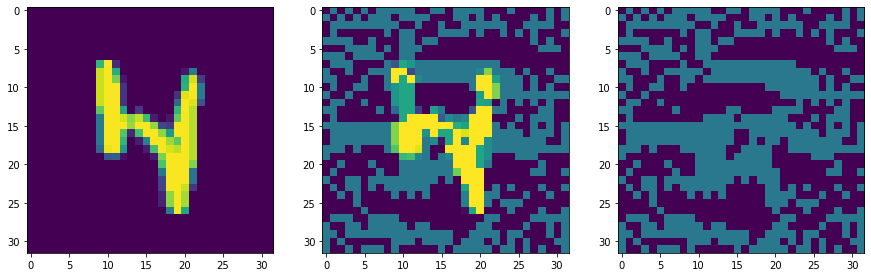


The misclassified images up to now are 29 out of 49:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8)] 


Working on image 50 of 100 with label 4

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 9 iterations.
Iterazione n. 3
ICG completed after 2 iterations.
Iterazione n. 4
ICG completed after 2 iterations.
Iterazione n. 5
ICG completed after 2 iterations.

New label: 9

Original Image - Perturbed Image - Noise 


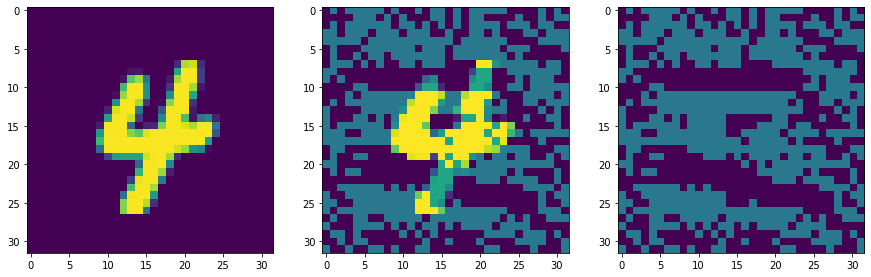


The misclassified images up to now are 30 out of 50:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9)] 


Working on image 51 of 100 with label 5

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 40 iterations.
Iterazione n. 3
ICG completed after 57 iterations.
Iterazione n. 4
ICG completed after 69 iterations.
Iterazione n. 5
ICG completed after 64 iterations.
Iterazione n. 6
ICG completed after 32 iterations.
Iterazione n. 7
ICG completed after 28 iterations.
Iterazione n. 8
ICG completed after 10 iterations.
Iterazione n. 9
ICG completed after 37 iterations.
Iterazione n. 10
ICG completed after 51 iterations.
It

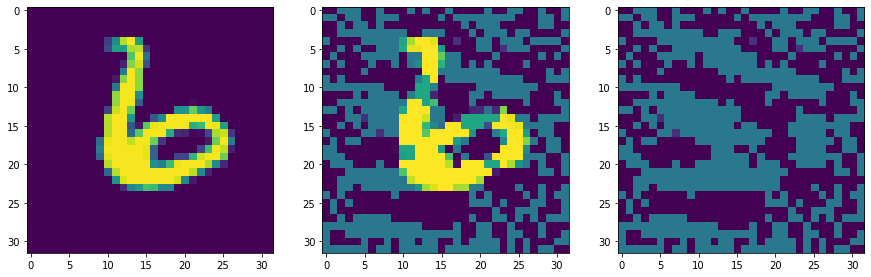


The misclassified images up to now are 31 out of 61:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2)] 


Working on image 62 of 100 with label 6

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 7 iterations.
Iterazione n. 3
ICG completed after 2 iterations.
Iterazione n. 4
ICG completed after 3 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


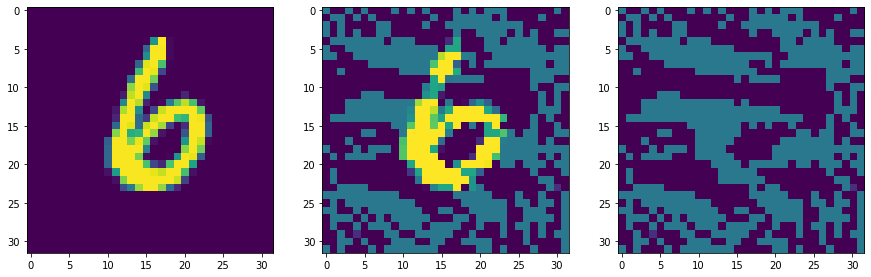


The misclassified images up to now are 32 out of 62:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5)] 


Working on image 63 of 100 with label 6

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 7 iterations.

New label: 8

Original Image - Perturbed Image - Noise 


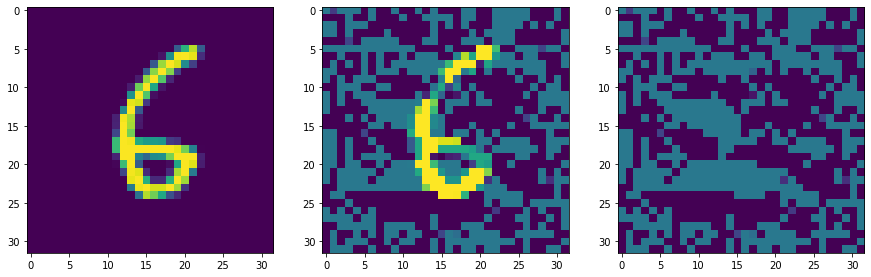


The misclassified images up to now are 33 out of 63:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8)] 


Working on image 64 of 100 with label 6

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 19 iterations.
Iterazione n. 3
ICG completed after 4 iterations.
Iterazione n. 4
ICG completed after 4 iterations.
Iterazione n. 5
ICG completed after 2 iterations.
Iterazione n. 6
ICG completed after 4 iterations.
Iterazione n. 7
ICG completed after 2 iterations.
Iterazione n. 8
ICG completed after 3 iterations.
Iterazione n. 9
ICG completed after 2 iterations.
Iterazione n. 10
ICG c

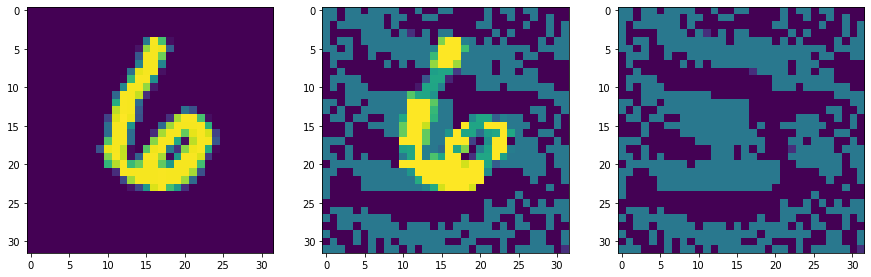


The misclassified images up to now are 34 out of 64:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2)] 


Working on image 65 of 100 with label 6

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 10 iterations.
Iterazione n. 3
ICG completed after 2 iterations.
Iterazione n. 4
ICG completed after 4 iterations.
Iterazione n. 5
ICG completed after 2 iterations.
Iterazione n. 6
ICG completed after 3 iterations.
Iterazione n. 7
ICG completed after 2 iterations.
Iterazione n. 8
ICG completed after 3 iterations.
Iterazione n. 9
ICG completed after 2 iterations.
Iterazion

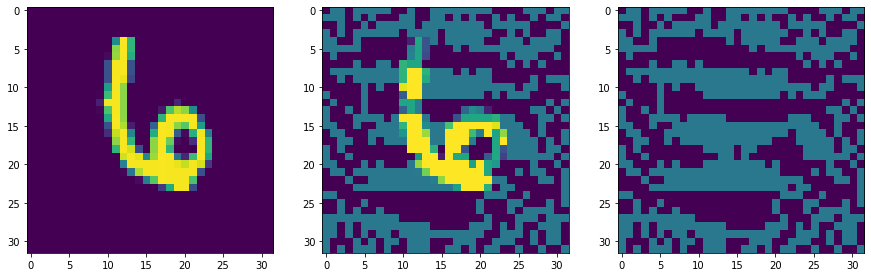


The misclassified images up to now are 35 out of 65:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2)] 


Working on image 66 of 100 with label 6

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 16 iterations.
Iterazione n. 3
ICG completed after 2 iterations.
Iterazione n. 4
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


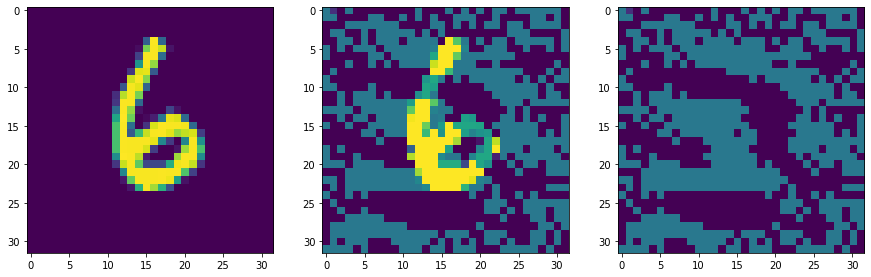


The misclassified images up to now are 36 out of 66:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2)] 


Working on image 67 of 100 with label 6

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 16 iterations.
Iterazione n. 3
ICG completed after 4 iterations.
Iterazione n. 4
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


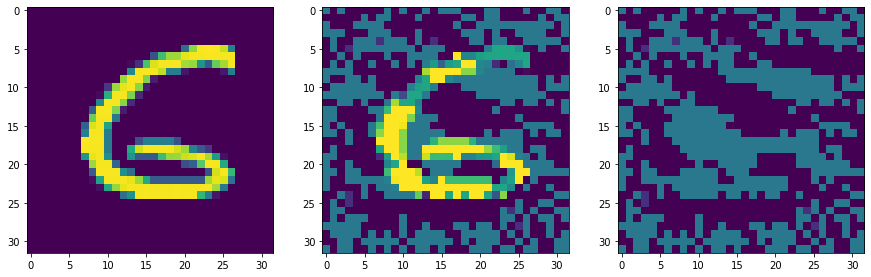


The misclassified images up to now are 37 out of 67:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2)] 


Working on image 68 of 100 with label 6

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 17 iterations.
Iterazione n. 3
ICG completed after 4 iterations.
Iterazione n. 4
ICG completed after 4 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


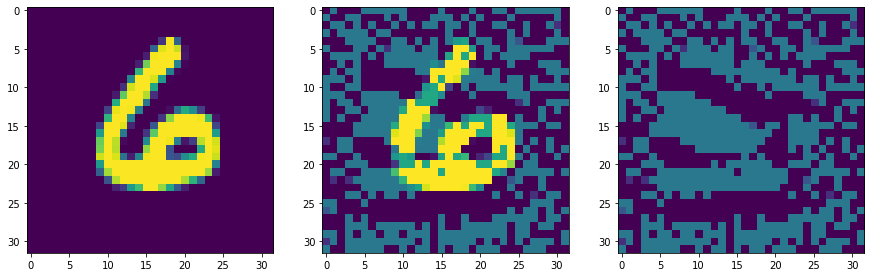


The misclassified images up to now are 38 out of 68:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2)] 


Working on image 69 of 100 with label 6

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 6 iterations.
Iterazione n. 3
ICG completed after 2 iterations.
Iterazione n. 4
ICG completed after 3 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


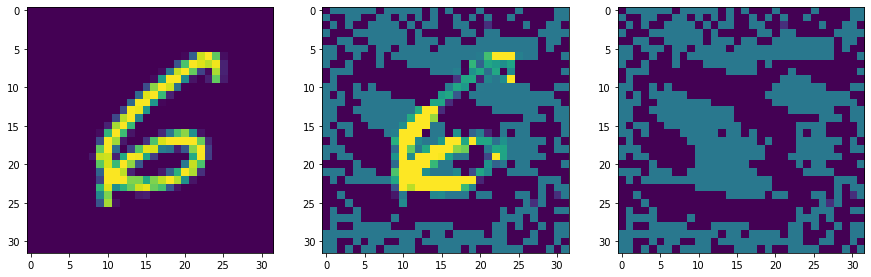


The misclassified images up to now are 39 out of 69:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2)] 


Working on image 70 of 100 with label 6

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 6 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 3 iterations.
Iterazione n. 5
ICG completed after 2 iterations.
Iterazione n. 6
ICG completed after 3 iterations.
Iterazione n. 7
ICG completed after 2 iterations.
Iterazione n. 8
ICG completed after 4 iterati

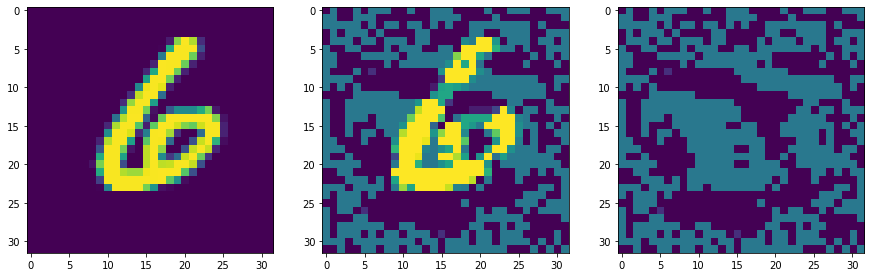


The misclassified images up to now are 40 out of 70:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0)] 


Working on image 71 of 100 with label 7

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 8 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 3 iterations.
Iterazione n. 5
ICG completed after 3 iterations.
Iterazione n. 6
ICG completed after 3 iterations.
Iterazione n. 7
ICG completed after 4 iterations.
Iterazione n. 8
ICG completed af

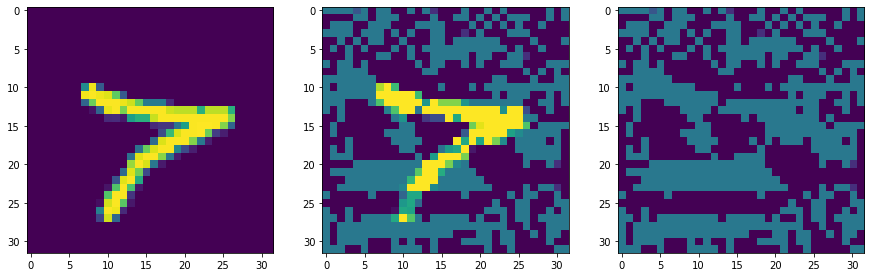


The misclassified images up to now are 41 out of 71:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2)] 


Working on image 72 of 100 with label 7

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 5 iterations.

New label: 2

Original Image - Perturbed Image - Noise 


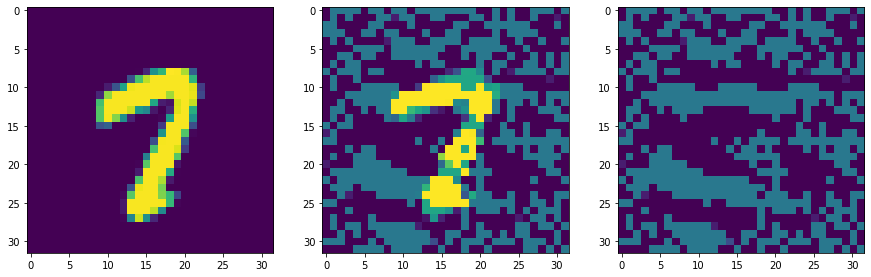


The misclassified images up to now are 42 out of 72:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2)] 


Working on image 73 of 100 with label 7

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 6 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


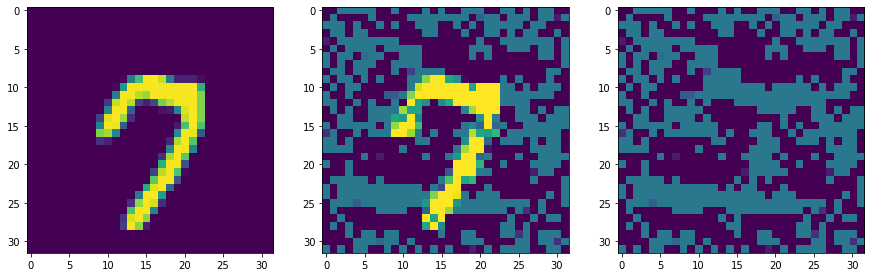


The misclassified images up to now are 43 out of 73:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5)] 


Working on image 74 of 100 with label 7

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 7 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 5 iterations.
Iterazione n. 5
ICG completed after 4 iterations.
Iterazione n. 6
ICG completed after 4 iterations.

New label: 2

Original Image - Perturbed I

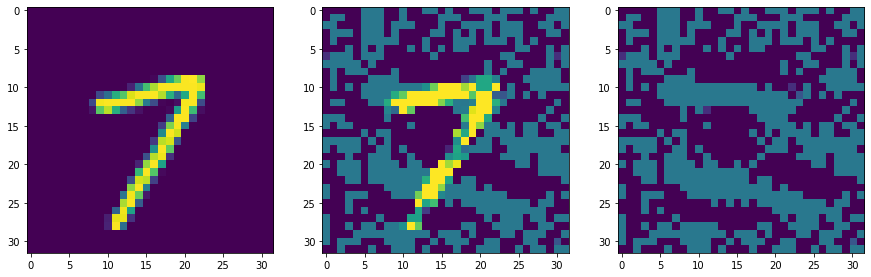


The misclassified images up to now are 44 out of 74:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2)] 


Working on image 75 of 100 with label 7

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 5 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


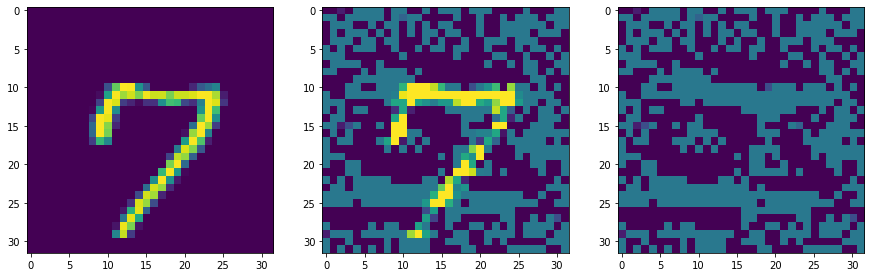


The misclassified images up to now are 45 out of 75:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5)] 


Working on image 76 of 100 with label 7

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 12 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 4 iterations.
Iterazione n. 5
ICG completed after 3 iterations.
Iterazione n. 6
ICG completed after 6 iterations.
Iterazione n. 7


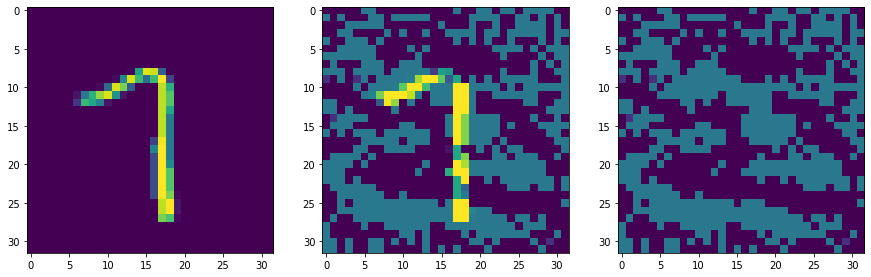


The misclassified images up to now are 46 out of 77:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3)] 


Working on image 78 of 100 with label 7

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 12 iterations.
Iterazione n. 3
ICG completed after 4 iterations.
Iterazione n. 4
ICG completed after 3 iterations.
Iterazione n. 5
ICG completed after 3 iterations.
Iterazione n. 6
ICG completed after 3 iterations.
Ite

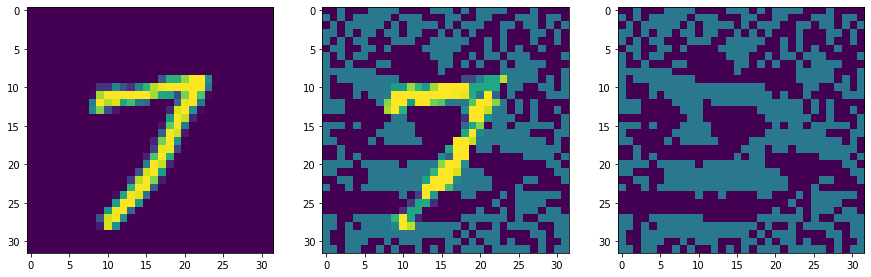


The misclassified images up to now are 47 out of 78:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2)] 


Working on image 79 of 100 with label 7

Iterazione n. 1
ICG completed after 3 iterations.
Iterazione n. 2
ICG completed after 16 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 7 iterations.
Iterazione n. 5
ICG completed after 4 iterations.
Iterazione n. 6
ICG completed after 5 it

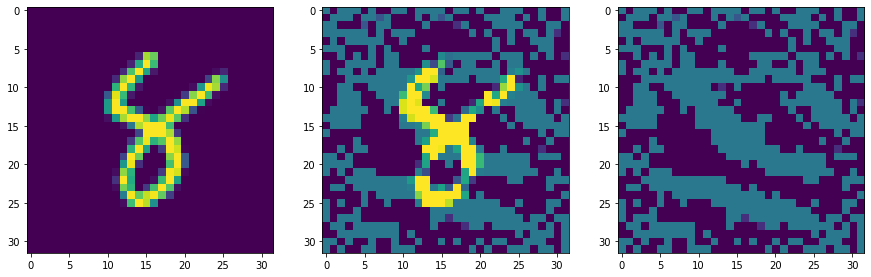


The misclassified images up to now are 48 out of 83:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5)] 


Working on image 84 of 100 with label 8

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 10 iterations.
Iterazione n. 5
ICG completed after 3 iterations.
Iterazione n. 6
ICG complet

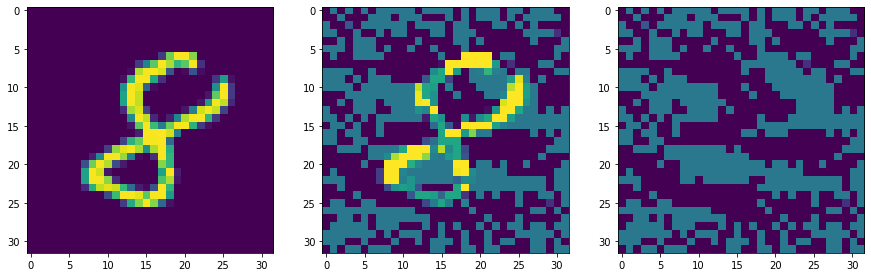


The misclassified images up to now are 49 out of 86:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2)] 


Working on image 87 of 100 with label 8

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 25 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 4 iterations.

New label: 5

Original Image - Perturbed Image - Noise 


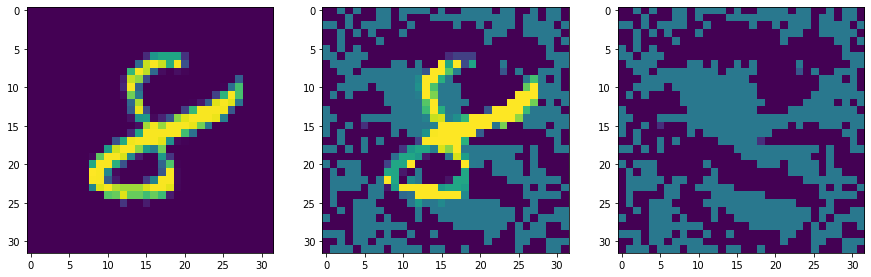


The misclassified images up to now are 50 out of 87:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5)] 


Working on image 88 of 100 with label 8

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 28 iterations.
Iterazione n. 3
ICG completed after 11 iterations.
Iterazione n. 4
ICG completed after 15 iterations.
Iterazione n. 5
ICG completed after 3 iterations.

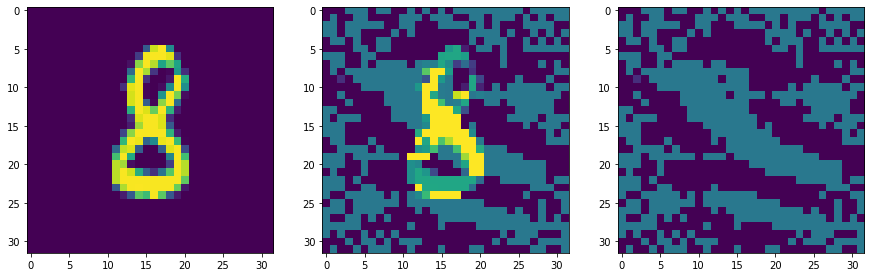


The misclassified images up to now are 51 out of 90:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5)] 


Working on image 91 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 15 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 4 iterations.
Iterazione n. 5
ICG completed after 3 

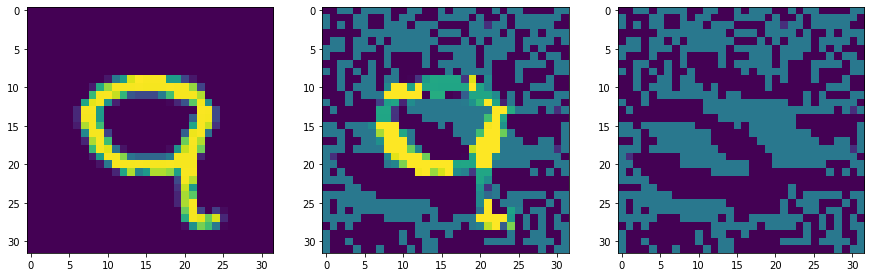


The misclassified images up to now are 52 out of 91:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4)] 


Working on image 92 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 3 iterations.

New label: 8

Original Image - Perturbed Image - Noise 


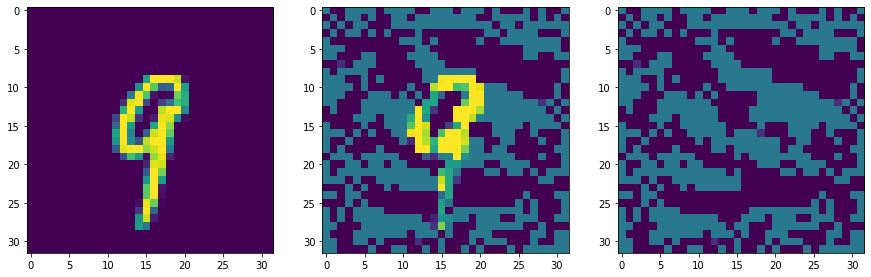


The misclassified images up to now are 53 out of 92:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8)] 


Working on image 93 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 7 iterations.

New label: 8

Original Image - Perturbed Image - Noise 


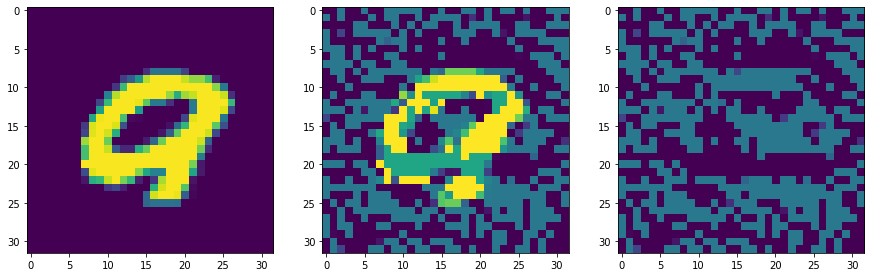


The misclassified images up to now are 54 out of 93:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8), (920, 9, 8)] 


Working on image 94 of 100 with label 9

Iterazione n. 1
ICG completed after 4 iterations.
Iterazione n. 2
ICG completed after 5 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 2 iterations.


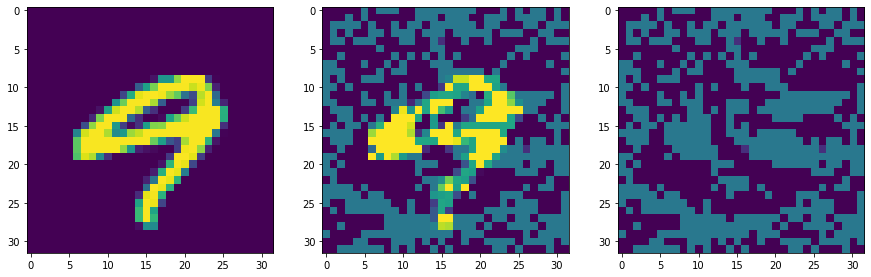


The misclassified images up to now are 55 out of 94:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8), (920, 9, 8), (930, 9, 4)] 


Working on image 95 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 7 iterations.
Iterazione n. 3
ICG completed after 3 iterations.
Iterazione n. 4
ICG completed after 2

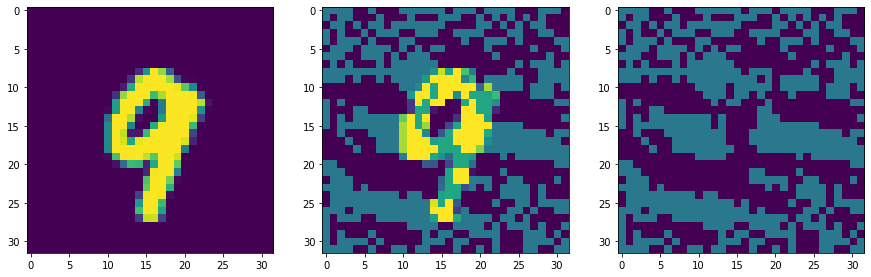


The misclassified images up to now are 56 out of 95:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8), (920, 9, 8), (930, 9, 4), (940, 9, 3)] 


Working on image 96 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.

New label: 8

Original Image - Perturbed Image - Noise 


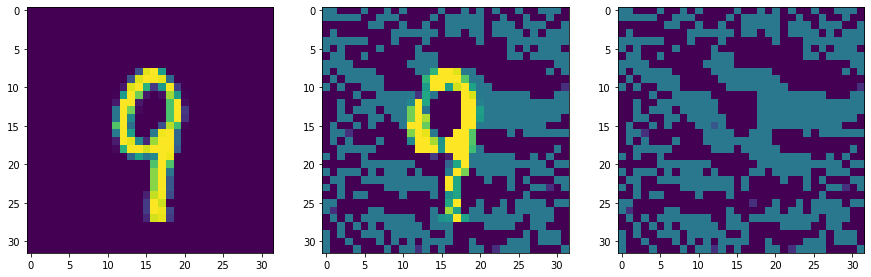


The misclassified images up to now are 57 out of 96:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8), (920, 9, 8), (930, 9, 4), (940, 9, 3), (950, 9, 8)] 


Working on image 97 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.
Iterazione n. 3
ICG completed after 3 iterations.

New label:

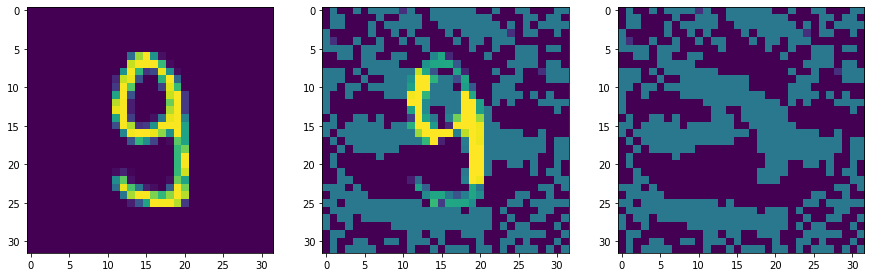


The misclassified images up to now are 58 out of 97:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8), (920, 9, 8), (930, 9, 4), (940, 9, 3), (950, 9, 8), (960, 9, 5)] 


Working on image 98 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 4 iterations.

New label: 8

Original Image - Perturbed Image 

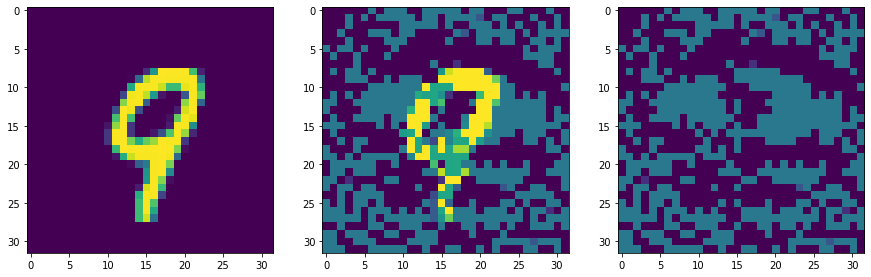


The misclassified images up to now are 59 out of 98:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8), (920, 9, 8), (930, 9, 4), (940, 9, 3), (950, 9, 8), (960, 9, 5), (970, 9, 8)] 


Working on image 99 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 5 iterations.
Iterazione n. 3
ICG completed after

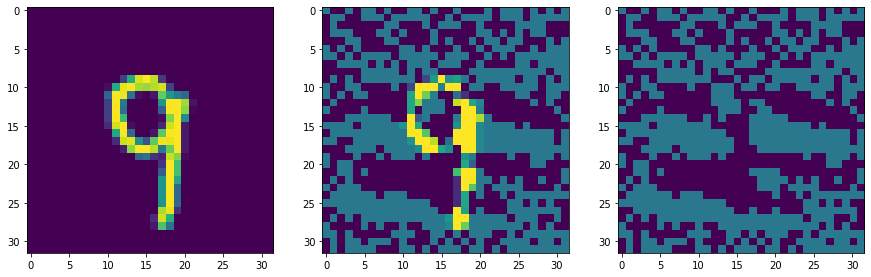


The misclassified images up to now are 60 out of 99:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8), (920, 9, 8), (930, 9, 4), (940, 9, 3), (950, 9, 8), (960, 9, 5), (970, 9, 8), (980, 9, 3)] 


Working on image 100 of 100 with label 9

Iterazione n. 1
ICG completed after 2 iterations.
Iterazione n. 2
ICG completed after 33 iterations.
Iterazione n. 3
ICG 

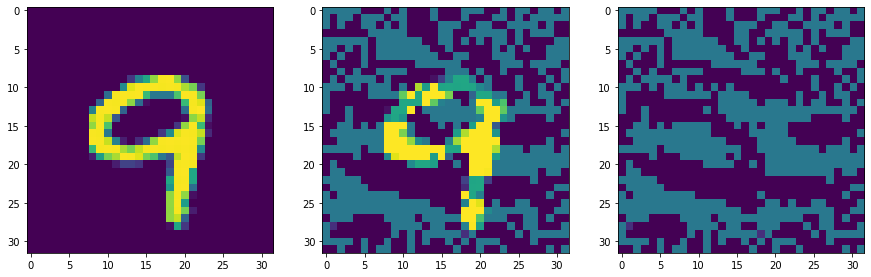


The misclassified images up to now are 61 out of 100:  [(50, 0, 2), (80, 0, 2), (100, 1, 5), (110, 1, 2), (120, 1, 5), (130, 1, 2), (140, 1, 5), (150, 1, 8), (160, 1, 8), (170, 1, 2), (180, 1, 2), (190, 1, 7), (300, 3, 5), (320, 3, 5), (330, 3, 5), (340, 3, 5), (350, 3, 5), (360, 3, 5), (370, 3, 5), (380, 3, 5), (400, 4, 2), (410, 4, 2), (420, 4, 7), (430, 4, 9), (440, 4, 2), (450, 4, 5), (460, 4, 3), (470, 4, 9), (480, 4, 8), (490, 4, 9), (600, 6, 2), (610, 6, 5), (620, 6, 8), (630, 6, 2), (640, 6, 2), (650, 6, 2), (660, 6, 2), (670, 6, 2), (680, 6, 2), (690, 6, 0), (700, 7, 2), (710, 7, 2), (720, 7, 5), (730, 7, 2), (740, 7, 5), (760, 7, 3), (770, 7, 2), (820, 8, 5), (850, 8, 2), (860, 8, 5), (890, 8, 5), (900, 9, 4), (910, 9, 8), (920, 9, 8), (930, 9, 4), (940, 9, 3), (950, 9, 8), (960, 9, 5), (970, 9, 8), (980, 9, 3), (990, 9, 4)] 




In [ ]:
dF.main_IU(model, xT, y_OH)